In [1]:
import pyabc
import matplotlib.pyplot as plt
import numpy as np
import pypesto

h = pyabc.History("sqlite:///h_boehm4.db")

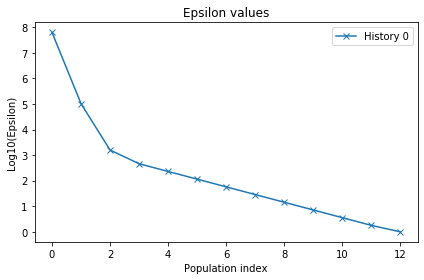

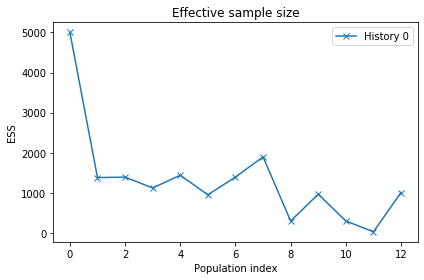

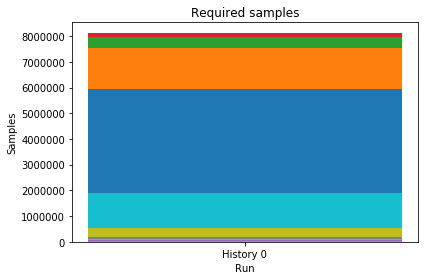

In [2]:
pyabc.visualization.plot_epsilons(h, scale='log10')
pyabc.visualization.plot_effective_sample_sizes(h)
pyabc.visualization.plot_sample_numbers(h)

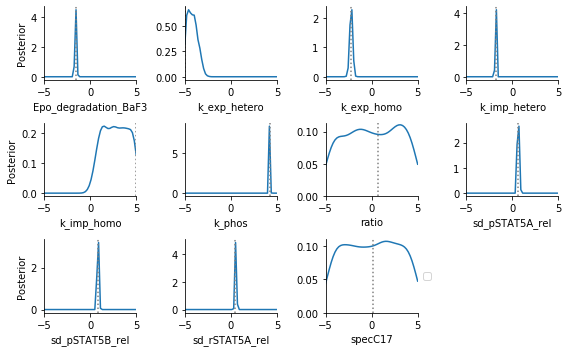

In [3]:
importer = pypesto.PetabImporter.from_folder("../model/Boehm_JProteomeRes2014")
problem = importer.petab_problem
parameters = problem.get_optimization_parameters()

refval = {}
lbound = {}
ubound = {}
limits = {}
pdf = problem.parameter_df.reset_index()
for p in parameters:
    refval[p] = float(pdf[pdf['parameterId'] == p]['nominalValue'])
    lbound[p] = float(pdf[pdf['parameterId'] == p]['lowerBound'])
    ubound[p] = float(pdf[pdf['parameterId'] == p]['upperBound'])
    limits[p] = (lbound[p], ubound[p])

fig = plt.figure()
for i, p in enumerate(parameters):
    ax = fig.add_subplot(3, 4, i+1)
    pyabc.visualization.plot_kde_1d_highlevel(
        h, x=p, xmin=lbound[p], xmax=ubound[p], refval=refval, refval_color='grey', ax=ax)
    if i % 4 != 0:
        ax.set_ylabel(None)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
fig.set_size_inches((8, 5))
fig.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for fmt in ['svg', 'eps']:
    plt.savefig(f"boehm_kde_1d.{fmt}", format=fmt)

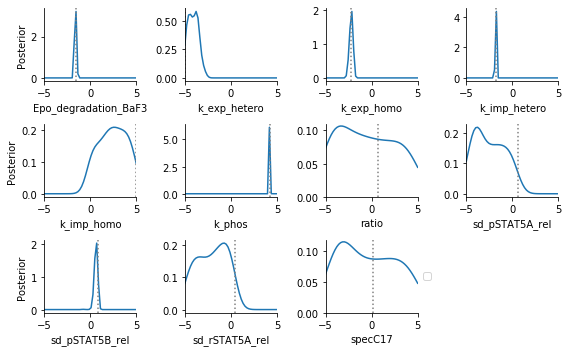

In [4]:
h_noisymodel = pyabc.History("sqlite:///h_boehm_noisymodel.db")

importer = pypesto.PetabImporter.from_folder("../model/Boehm_JProteomeRes2014")
problem = importer.petab_problem
parameters = problem.get_optimization_parameters()

refval = {}
lbound = {}
ubound = {}
limits = {}
pdf = problem.parameter_df.reset_index()
for p in parameters:
    refval[p] = float(pdf[pdf['parameterId'] == p]['nominalValue'])
    lbound[p] = float(pdf[pdf['parameterId'] == p]['lowerBound'])
    ubound[p] = float(pdf[pdf['parameterId'] == p]['upperBound'])
    limits[p] = (lbound[p], ubound[p])

fig = plt.figure()
for i, p in enumerate(parameters):
    ax = fig.add_subplot(3, 4, i+1)
    pyabc.visualization.plot_kde_1d_highlevel(
        h_noisymodel, x=p, xmin=lbound[p], xmax=ubound[p], refval=refval, refval_color='grey', ax=ax)
    if i % 4 != 0:
        ax.set_ylabel(None)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
fig.set_size_inches((8, 5))
fig.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for fmt in ['svg', 'eps']:
    plt.savefig(f"boehm_noisymodel_kde_1d.{fmt}", format=fmt)

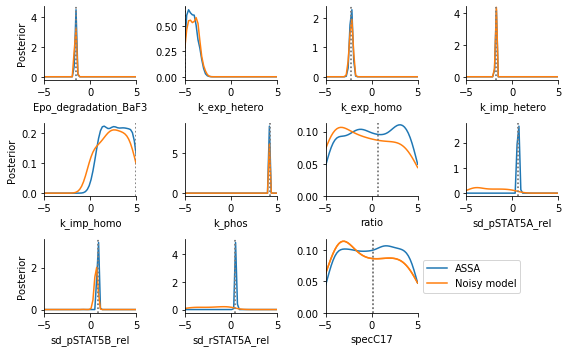

In [3]:
h_noisymodel = pyabc.History("sqlite:///h_boehm_noisymodel.db")

importer = pypesto.PetabImporter.from_folder("../model/Boehm_JProteomeRes2014")
problem = importer.petab_problem
parameters = problem.get_optimization_parameters()

refval = {}
lbound = {}
ubound = {}
limits = {}
pdf = problem.parameter_df.reset_index()
for p in parameters:
    refval[p] = float(pdf[pdf['parameterId'] == p]['nominalValue'])
    lbound[p] = float(pdf[pdf['parameterId'] == p]['lowerBound'])
    ubound[p] = float(pdf[pdf['parameterId'] == p]['upperBound'])
    limits[p] = (lbound[p], ubound[p])

fig = plt.figure()
for i, p in enumerate(parameters):
    ax = fig.add_subplot(3, 4, i+1)
    if i == 10:
        pyabc.visualization.plot_kde_1d_highlevel(
        h_noisymodel, x=p, xmin=lbound[p], xmax=ubound[p], refval=refval, refval_color='grey', ax=ax, color='C1')
    pyabc.visualization.plot_kde_1d_highlevel(
        h, x=p, xmin=lbound[p], xmax=ubound[p], refval=refval, refval_color='grey', ax=ax, label="ASSA", color='C0')
    pyabc.visualization.plot_kde_1d_highlevel(
        h_noisymodel, x=p, xmin=lbound[p], xmax=ubound[p], refval=refval, refval_color='grey', ax=ax, label="Noisy model", color='C1')
    if i % 4 != 0:
        ax.set_ylabel(None)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
fig.set_size_inches((8, 5))
fig.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for fmt in ['svg', 'eps']:
    plt.savefig(f"boehm_combined_kde_1d.{fmt}", format=fmt)

In [6]:
print("Total samples stochastic acceptor: ", sum(h.get_all_populations()['samples']))
print("Total samples noisy model: ", sum(h_noisymodel.get_all_populations()['samples']))

for h, label in zip([h, h_noisymodel], ["stochastic acceptor", "noisy model"]):
    print(f"ESS {label}: ", pyabc.weighted_statistics.effective_sample_size(h.get_distribution()[1]))

Total samples stochastic acceptor:  8128183
Total samples noisy model:  12575251
ESS stochastic acceptor:  1010.5843031286217
ESS noisy model:  83.12914588264627


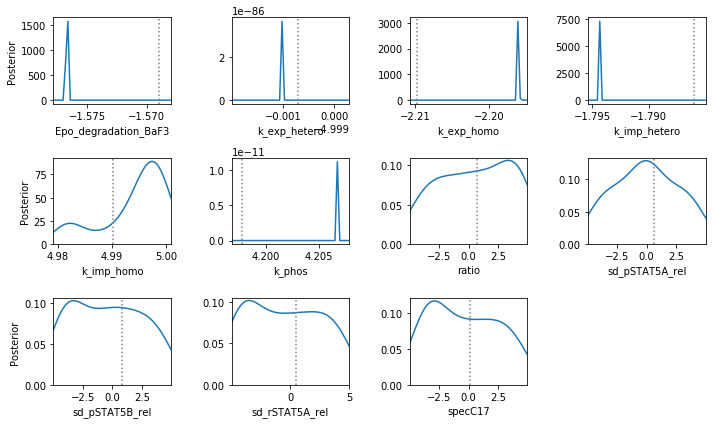

In [7]:
h_incorrect = pyabc.History("sqlite:///h_boehm_incorrect.db")

importer = pypesto.PetabImporter.from_folder("../model/Boehm_JProteomeRes2014")
problem = importer.petab_problem
parameters = problem.get_optimization_parameters()

refval = {}
lbound = {}
ubound = {}
limits = {}
pdf = problem.parameter_df.reset_index()
df, w = h_incorrect.get_distribution()
for p in parameters:
    refval[p] = float(pdf[pdf['parameterId'] == p]['nominalValue'])
    lbound[p] = min(refval[p]-0.001, min(df[p])-0.001)
    ubound[p] = max(refval[p]+0.001, max(df[p])+0.001)
    limits[p] = (lbound[p], ubound[p])
fig = plt.figure()
for i, p in enumerate(parameters):
    ax = fig.add_subplot(3, 4, i+1)
    pyabc.visualization.plot_kde_1d_highlevel(
        h_incorrect, x=p, refval=refval, xmin=lbound[p], xmax=ubound[p], refval_color='grey', ax=ax)
    if i % 4 != 0:
        ax.set_ylabel(None)
fig.set_size_inches((10, 6))
fig.tight_layout()

for fmt in ['svg', 'eps']:
    plt.savefig(f"boehm_incorrect_kde_1d.{fmt}", format=fmt)

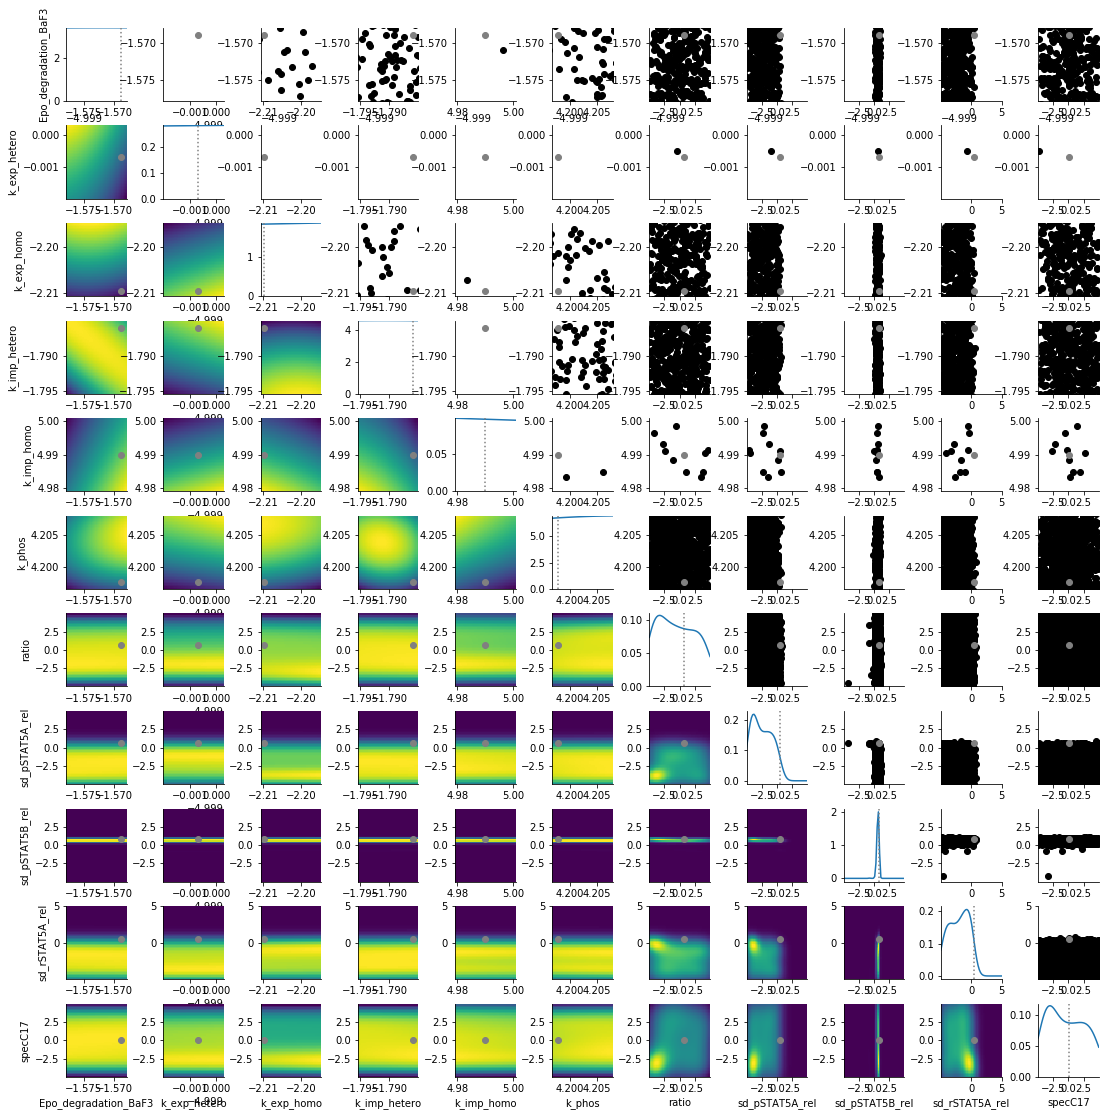

In [8]:
pyabc.visualization.plot_kde_matrix_highlevel(h, refval=refval, refval_color='grey', limits=limits, colorbar=False)
plt.gcf().set_size_inches((15,15))
fig.tight_layout()
for fmt in ['svg', 'eps']:
    plt.savefig(f"boehm_kde_matrix.{fmt}", format=fmt)

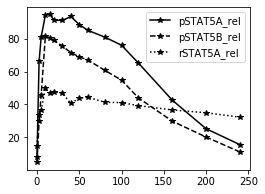

In [9]:
data = {}
df = problem.measurement_df
for obsId in np.unique(df['observableId']):
    data[obsId] = df[df['observableId']==obsId][['time', 'measurement']]
fig, ax = plt.subplots()
for obsId, linestyle in zip(data, ['-', 'dashed', 'dotted']):
    ax.plot(data[obsId]['time'], data[obsId]['measurement'], color='k', linestyle=linestyle, marker='*', label=obsId)
ax.legend()
fig.set_size_inches((4,3))

## Plots simulated data

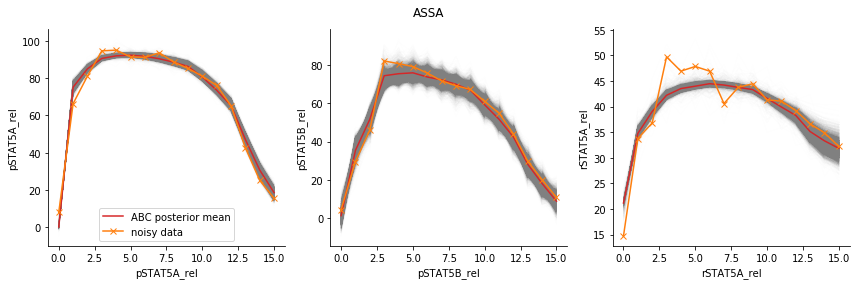

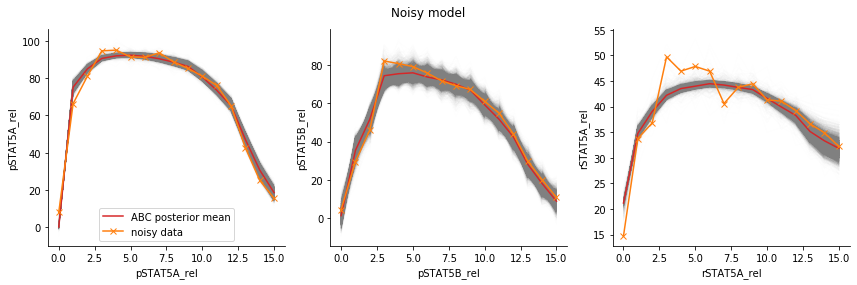

In [10]:
data = h.observed_sum_stat()

def plot_sum_stats(h, title, id_ = None):
    fig, arr_ax = plt.subplots(1, 3)

    def f_plot(sum_stat, weight, arr_ax, **kwargs):
        for i, key in enumerate(sum_stat.keys()):
            arr_ax[i].plot(sum_stat[key], '-', color='grey', alpha=5*1/1e3)#min(8*weight, 1))
        
    def f_plot_mean(sum_stats, weights, arr_ax, **kwargs):
        aggregated = {}
        for key in sum_stats[0].keys():
            aggregated[key] = (np.array([sum_stat[key] for sum_stat in sum_stats]) \
                               * np.array(weights).reshape((-1,1))).sum(axis=0)
        for i, key in enumerate(aggregated.keys()):
            arr_ax[i].plot(aggregated[key], '-', color='C3', alpha=1, label='ABC posterior mean')

    pyabc.visualization.plot_data_callback(h, f_plot, f_plot_mean, ax=arr_ax)

    for i, key in enumerate(data.keys()):
        arr_ax[i].plot(data[key], 'x-', color='C1', label='noisy data')
        arr_ax[i].set_ylabel(key)
        arr_ax[i].set_xlabel(key)
    arr_ax[0].legend()
    for ax in arr_ax:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    fig.suptitle(title)
    fig.set_size_inches((12, 4))
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    
    if id_:
        for fmt in ['svg', 'png']:
            plt.savefig(f"simulated_data_{id_}.{fmt}", format=fmt)
    

plot_sum_stats(h, "ASSA", 'stochacc')
plot_sum_stats(h_noisymodel, "Noisy model", 'noisymodel')